In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

data = pd.DataFrame()

d1 = pd.read_csv("new_york/tomslee_airbnb_new_york_0940_2017-03-14.csv")
print(d1.columns)
print(len(d1.index))
d2 = pd.read_csv("new_york/tomslee_airbnb_new_york_1129_2017-04-21.csv")
print(d2.columns)
print(len(d2.index))
d3 = pd.read_csv("new_york/tomslee_airbnb_new_york_1196_2017-05-06.csv")
print(d3.columns)
print(len(d3.index))
d4 = pd.read_csv("new_york/tomslee_airbnb_new_york_1318_2017-06-12.csv")
print(d4.columns)
print(len(d4.index))
d5 = pd.read_csv("new_york/tomslee_airbnb_new_york_1438_2017-07-12.csv")
print(d5.columns)
print(len(d5.index))

In [3]:
data = pd.read_csv("new_york_data.csv")
#data = pd.read_csv("nyc-5.csv")

/NAS/home01/toshal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,9,12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Number of null values in the columns 

In [4]:
data.isna().sum()

accommodates             37112
bathrooms               901209
bedrooms                 52730
borough                      0
city                    740319
country                 901209
host_id                    280
last_modified                0
latitude                     0
location                740319
longitude                    0
minstay                 328562
name                    740401
neighborhood                 0
overall_satisfaction    223036
price                        0
property_type           740319
reviews                   5721
room_id                      0
room_type                  318
survey_id               740319
dtype: int64

In [5]:
data3 = data.drop_duplicates()
print(len(data3.index))

901209


In [6]:
data.columns
data.head()

,accommodates,bathrooms,bedrooms,borough,city,country,host_id,last_modified,latitude,location,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,2.0,NaN,1.0,Queens,NaN,NaN,1411399.0,2015-08-10 21:44:27.340600,40.766842,NaN,...,30.0,NaN,Astoria,4.5,2492.0,NaN,18.0,269404,Private room,NaN
1,2.0,NaN,1.0,Manhattan,NaN,NaN,10193030.0,2015-08-10 21:44:27.340600,40.823490,NaN,...,3.0,NaN,Harlem,5.0,85.0,NaN,2.0,2451438,Private room,NaN
2,2.0,NaN,1.0,Manhattan,NaN,NaN,12095101.0,2015-08-10 21:44:27.340600,40.763632,NaN,...,20.0,NaN,Hell's Kitchen,4.5,140.0,NaN,2.0,2905768,Entire home/apt,NaN
3,1.0,NaN,1.0,Brooklyn,NaN,NaN,8638841.0,2015-08-10 21:44:27.340600,40.705528,NaN,...,3.0,NaN,Williamsburg,5.0,80.0,NaN,24.0,1624665,Private room,NaN
4,4.0,NaN,2.0,Brooklyn,NaN,NaN,17830235.0,2015-08-10 21:44:27.340600,40.717866,NaN,...,3.0,NaN,Williamsburg,4.5,299.0,NaN,14.0,3542044,Entire home/apt,NaN


#### Unique values for each column

In [7]:
cols=[]
value=[]
nu=[]
for col in data.columns:
    cols.append(col)
    value.append(', '.join([str(elem) for elem in data[col].unique()]))
    nu.append(data[col].nunique())
datacols = pd.DataFrame({'columns': cols, 'unique_value':value, '#unique_vals':nu})
datacols

,columns,unique_value,#unique_vals
0,accommodates,"2.0, 1.0, 4.0, 3.0, nan, 5.0, 6.0, 16.0, 10.0,...",16
1,bathrooms,nan,0
2,bedrooms,"1.0, 2.0, 0.0, 3.0, 4.0, 5.0, nan, 6.0, 7.0, 8...",12
3,borough,"Queens, Manhattan, Brooklyn, Bronx, Staten Island",5
4,city,"nan, New York",1
5,country,nan,0
6,host_id,"1411399.0, 10193030.0, 12095101.0, 8638841.0, ...",77426
7,last_modified,"2015-08-10 21:44:27.340600, 2015-08-10 21:45:0...",854955
8,latitude,"40.766842, 40.82349, 40.763632, 40.705528, 40....",85183
9,location,"nan, 0101000020E61000000664AF777F7D52C0EB724A4...",51993


### Finding Correaltion

accommodates: mean=2.716 stdv=1.641
price: mean=152.471 stdv=353.142
[[            nan             nan]
 [            nan 124709.23644577]]


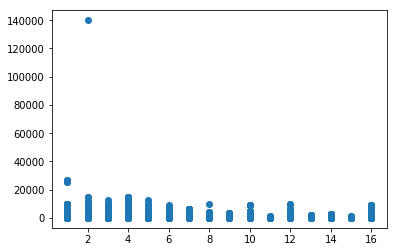

In [8]:
print('accommodates: mean=%.3f stdv=%.3f' % (np.mean(data['accommodates']), np.std(data['accommodates'])))
print('price: mean=%.3f stdv=%.3f' % (np.mean(data['price']), np.std(data['price'])))
# calculate covariance matrix
covariance = np.cov(data['accommodates'], data['price'])
print(covariance)

plt.scatter(data['accommodates'], data['price'])
plt.show()

In [ ]:
## removing outlier
from scipy import stats
z_scores = stats.zscore(data)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = data[filtered_entries]

print(new_df)
plt.scatter(new_df['accommodates'], new_df['price'])
plt.show()